In [22]:
# ------------- CAFECHUNGKHOAN.COM ---------------------------
# ------------- data analysis and wrangling-------------------
import pandas as pd
import numpy as np
import random as rnd
from pandas import DataFrame
import warnings
warnings.filterwarnings("ignore")
import shap
# ------------------------------------------------------------

# ------- import các tool visualization ----------------------
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# ------------------------------------------------------------

In [2]:
eda = pd.read_csv(r"C:\PYTHON LEARNING\DATA\covid19 korea\patient.csv")
eda = pd.DataFrame(eda)
eda

,id,sex,birth_year,country,region,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state
0,1,female,1984.0,China,filtered at airport,NaN,visit to Wuhan,1.0,NaN,45.0,2020-01-20,2020-02-06,NaN,released
1,2,male,1964.0,Korea,filtered at airport,NaN,visit to Wuhan,1.0,NaN,75.0,2020-01-24,2020-02-05,NaN,released
2,3,male,1966.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,16.0,2020-01-26,2020-02-12,NaN,released
3,4,male,1964.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,95.0,2020-01-27,2020-02-09,NaN,released
4,5,male,1987.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,31.0,2020-01-30,2020-03-02,NaN,released
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5761,5762,NaN,NaN,Korea,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-04,NaN,NaN,isolated
5762,5763,NaN,NaN,Korea,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-04,NaN,NaN,isolated
5763,5764,NaN,NaN,Korea,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-04,NaN,NaN,isolated
5764,5765,NaN,NaN,Korea,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-04,NaN,NaN,isolated


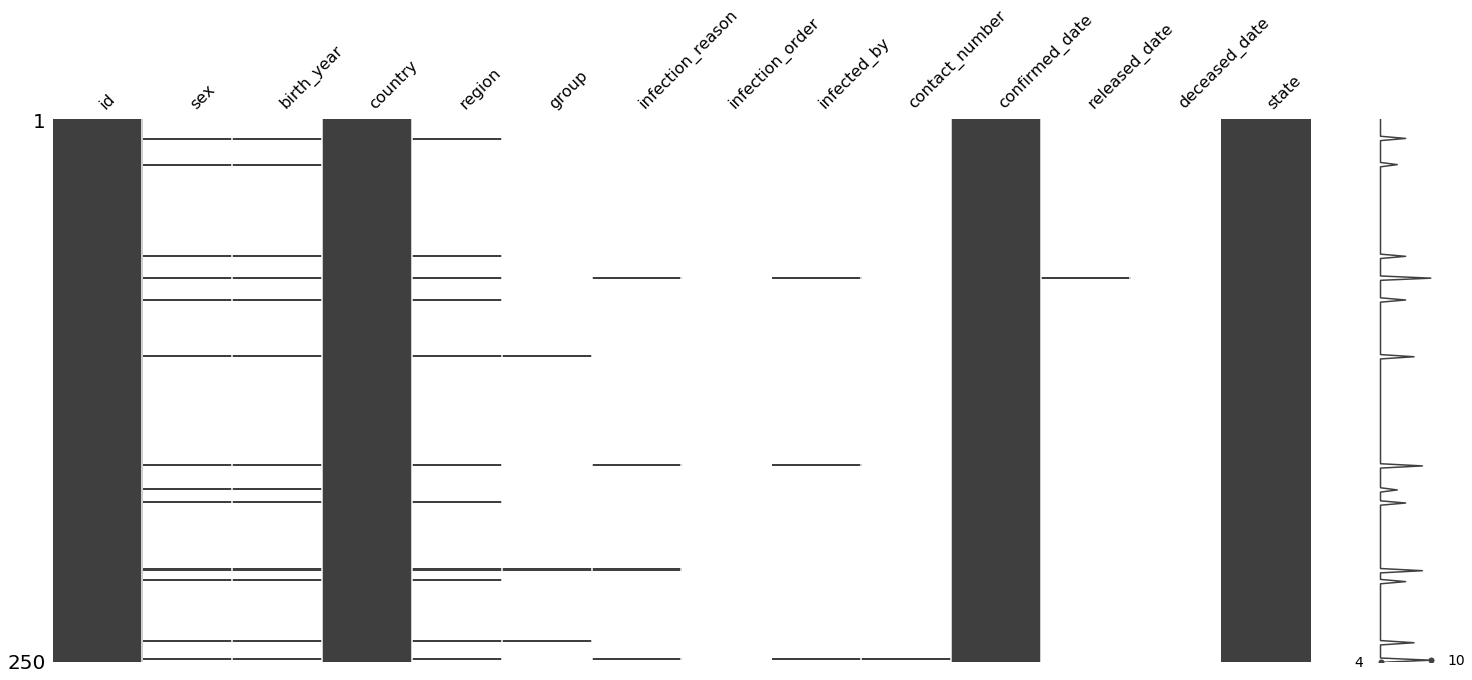

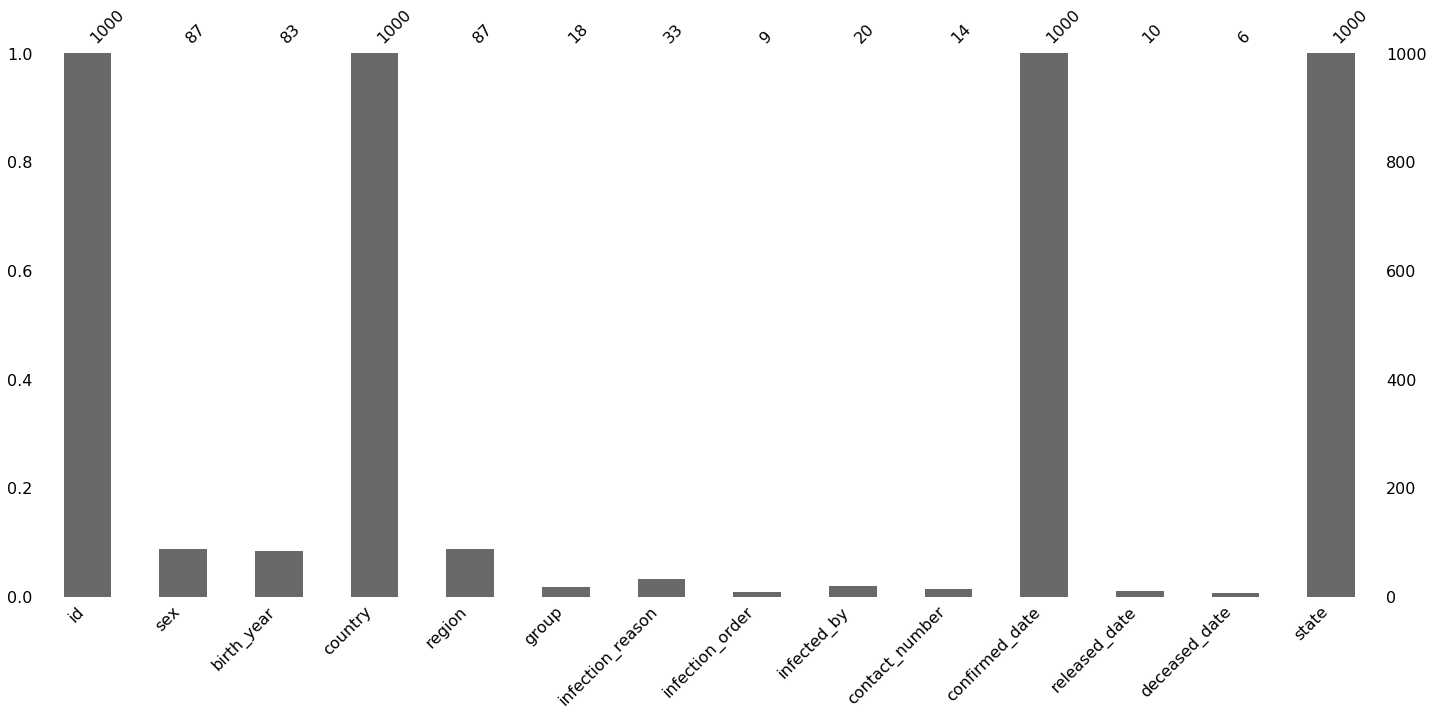

In [3]:
import missingno as msno
import numpy as np
collisions = eda.replace("nan", np.nan)
msno.matrix(collisions.sample(250))
plt.show()
msno.bar(collisions.sample(1000))
plt.show()

## Quan sát phân phối xác suất khả năng tử vong của nam và nữ

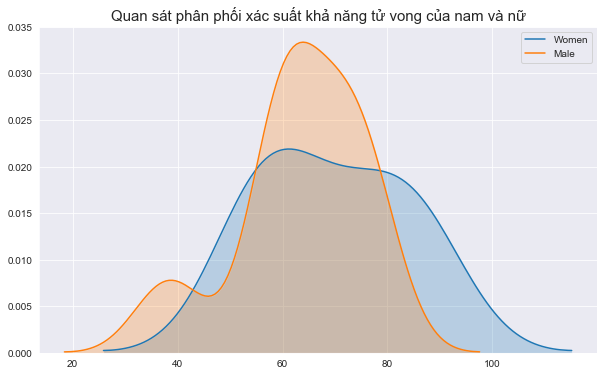

In [15]:
df_patient = eda
df_patient['birth_year'] = df_patient.birth_year.fillna(0.0).astype(int)
df_patient['birth_year'] = df_patient['birth_year'].map(lambda val: val if val > 0 else np.nan)

df_patient.confirmed_date = pd.to_datetime(df_patient.confirmed_date)
daily_count = df_patient.groupby(df_patient.confirmed_date).id.count()

df_patient['age'] = 2020 - df_patient['birth_year'] 

dead = df_patient[df_patient.state == 'deceased']
male_dead = dead[dead.sex=='male']
female_dead = dead[dead.sex=='female']
plt.figure(figsize=(10,6))
sns.set_style("darkgrid")
plt.title("Quan sát phân phối xác suất khả năng tử vong của nam và nữ",{'fontsize': 15})
a = sns.kdeplot(data=female_dead['age'], label="Women", shade=True)
b = sns.kdeplot(data=male_dead['age'],label="Male" ,shade=True)


## Giai đoạn bùng nổ dịch ở Korea

Text(0.5, 1.0, 'Giai đoạn bùng phát dịch tại Korea')

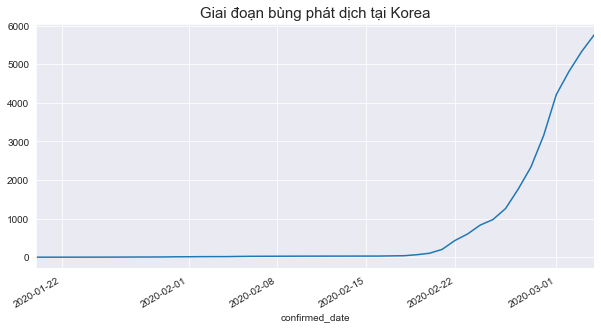

In [16]:
plt.figure(figsize=(10,5))
bung_phat_dich = daily_count.cumsum()
bung_phat_dich.plot()
plt.title('Giai đoạn bùng phát dịch tại Korea',{'fontsize': 15})

## Quan sát bản đồ khu vực có bệnh COVID19

In [6]:
df_route = pd.read_csv(r"C:\PYTHON LEARNING\DATA\covid19 korea\route.csv")
import folium
southkorea_map = folium.Map(location=[36.55,126.983333 ], zoom_start=7,tiles='Stamen Toner')

for lat, lon,city in zip(df_route['latitude'], df_route['longitude'],df_route['city']):
    folium.CircleMarker([lat, lon],
                        radius=5,
                        color='red',
                      popup =('City: ' + str(city) + '<br>'),
                        fill_color='red',
                        fill_opacity=0.7 ).add_to(southkorea_map)
southkorea_map

## Quan sát tỉnh / thành nhiều người bệnh

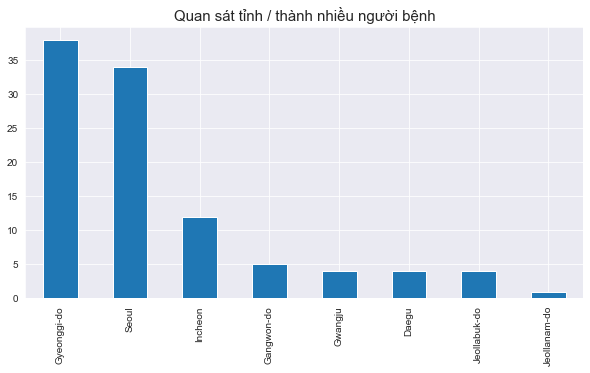

In [18]:
plt.figure(figsize=(10,5))
plt.title('Quan sát tỉnh / thành nhiều người bệnh',{'fontsize': 15})
df_route.province.value_counts().plot.bar();

## Nguyên nhân lây nhiễm

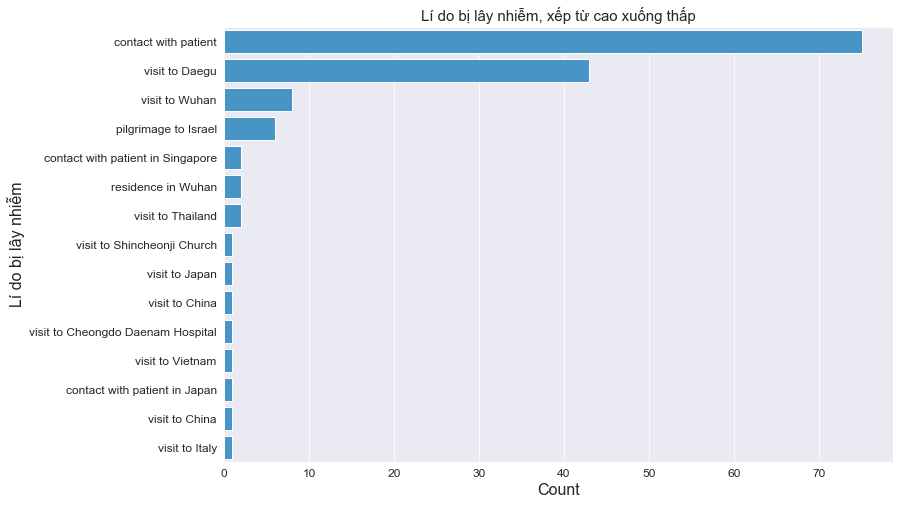

In [19]:
# Reason of infection
reason_order = list(eda["infection_reason"].value_counts().index)
plt.figure(figsize=(12, 8))
sns.countplot(y = "infection_reason",data = eda , order = reason_order,color='#3498db')
plt.title("Lí do bị lây nhiễm, xếp từ cao xuống thấp", fontsize=15)
plt.xlabel("Count", fontsize=16)
plt.ylabel("Lí do bị lây nhiễm", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

## Quan sát phân phối xác suất giữa tử vong & hồi phục

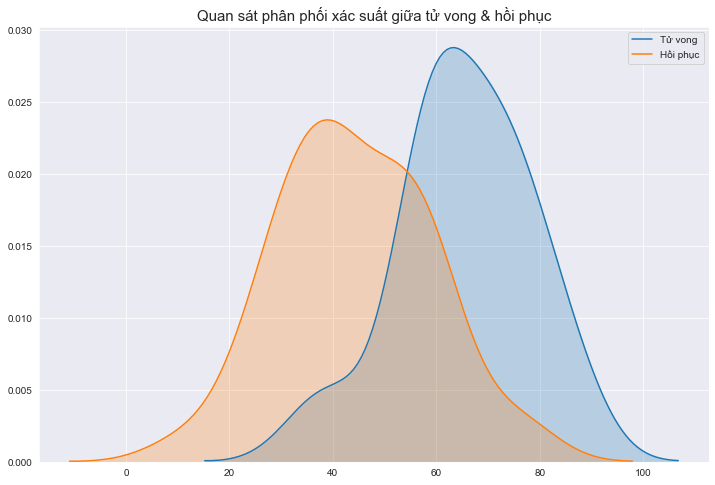

In [20]:
released = eda[eda.state == 'released']
dead = eda[eda.state == 'deceased']
state = eda[eda.state == 'isolated state']
plt.figure(figsize=(12, 8))
plt.title("Quan sát phân phối xác suất giữa tử vong & hồi phục", fontsize=15)
sns.kdeplot(data=dead['age'],label='Tử vong', shade=True)
sns.kdeplot(data=released['age'],label='Hồi phục', shade=True)

## Quan sát so sánh giữ mưc ý nghĩa và độ lệch chuẩn

In [10]:
released.describe()

,id,birth_year,infection_order,infected_by,contact_number,age
count,40.00000,40.000000,26.000000,17.000000,26.000000,40.000000
mean,282.22500,1975.725000,1.807692,20.588235,68.538462,44.275000
std,655.37386,14.416848,0.800961,29.593198,123.795713,14.416848
min,1.00000,1944.000000,1.000000,3.000000,0.000000,11.000000
25%,10.75000,1964.000000,1.000000,6.000000,2.250000,35.000000
50%,20.50000,1977.500000,2.000000,12.000000,16.500000,42.500000
75%,54.00000,1985.000000,2.000000,20.000000,62.750000,56.000000
max,2833.00000,2009.000000,3.000000,126.000000,450.000000,76.000000


In [11]:
dead.describe()

,id,birth_year,infection_order,infected_by,contact_number,age
count,23.000000,23.000000,0.0,0.0,0.0,23.000000
mean,1342.956522,1954.608696,NaN,NaN,NaN,65.391304
std,1492.818064,12.579706,NaN,NaN,NaN,12.579706
min,38.000000,1934.000000,NaN,NaN,NaN,36.000000
25%,159.500000,1945.500000,NaN,NaN,NaN,58.000000
50%,875.000000,1955.000000,NaN,NaN,NaN,65.000000
75%,2332.000000,1962.000000,NaN,NaN,NaN,74.500000
max,5143.000000,1984.000000,NaN,NaN,NaN,86.000000


## Quan sát phân phối xác suất của tử vong & hồi phục: thấy không có trường hợp tử vong dưới 20 tuổi

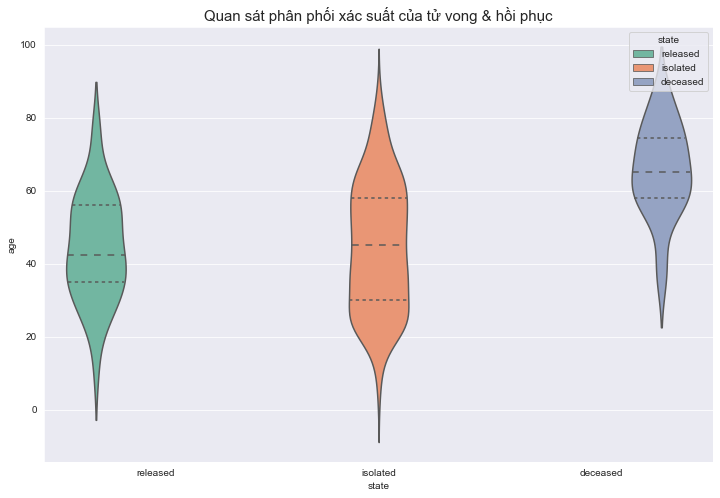

In [21]:
plt.figure(figsize=(12, 8))
plt.title("Quan sát phân phối xác suất của tử vong & hồi phục", fontsize=15)
sns.violinplot(y="age", x="state",hue = 'state', data=eda,palette="Set2",scale="count", inner="quartile")